In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, Point

import os
import sys
module_path = os.path.abspath(os.path.join('..'))

if module_path not in sys.path:
    sys.path.append(module_path)
    
from pyslabgrid import slabgridding as slg

#### Generate Sheets or 3-D Surfaces for the Slab Models

The three sheets based on depth distrbution (orthogonal distance down from the interface) and the interface model.  

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
};

<IPython.core.display.Javascript object>

In [3]:
def read_plot_grid(gridfile):
    x1,y1,z1,x2,y2,z2,x3,y3,z3 = slg.read_grid(gridfile)
    %matplotlib notebook
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(7,7))
    ax.plot3D(x1, y1, z1,'.', color='c');
    ax.plot3D(x2, y2, z2,'.', color='r');
    ax.plot3D(x3, y3, z3,'.', color='k');
    ax.invert_zaxis()

def read_plot_meshgrid(meshgridfile, maxdepth=None):
    x,y,z,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,y4,z4 = slg.read_meshgrid(meshgridfile, maxdepth=maxdepth)
    %matplotlib notebook
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(7,7))
    ax.plot3D(x, y, z,'.', color='r', markersize= 0.5);
    ax.plot3D(x1, y1, z1,'.', color='k', alpha=0.2,  markersize= 0.3);
    ax.plot3D(x2, y2, z2,'.', color='k', alpha=0.2,  markersize= 0.3);
    ax.plot3D(x3, y3, z3,'.', color='k', alpha=0.2,  markersize= 0.3);
    ax.plot3D(x4, y4, z4,'.', color='k', alpha=0.2, markersize= 0.3);
    ax.invert_zaxis()

In [4]:
depdistr = {'hik': [[17, 29, 40]], 'puy': [[10,15,20]], }
outfolder = 'grids/'
file_hik_grids, file_hik_midslab_slabmesh =  slg.generate_gridfiles('hik', DX_KM = 11, \
                                                        outfolder = outfolder, depdistr=depdistr)

file_puy_grids, file_puy_midslab_mesh =  slg.generate_gridfiles('puy', DX_KM = 11, \
                                                        outfolder = outfolder, depdistr=depdistr)


>>> FILES written: 
grids/hik_11km_grids.csv
grids/hik_11km_meshed-midslabgrids.csv

>>> FILES written: 
grids/puy_11km_grids.csv
grids/puy_11km_meshed-midslabgrids.csv


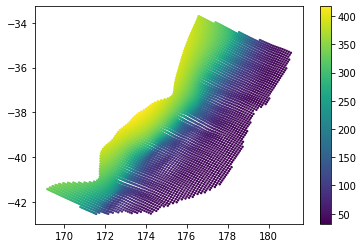

In [5]:
%matplotlib inline
x,y,z,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,y4,z4 = slg.read_meshgrid('grids/hik_11km_meshed-midslabgrids.csv', \
                                                          maxdepth=500)
plt.scatter(x,y,c=z, s=2)
plt.colorbar()
plt.show()

<IPython.core.display.Javascript object>


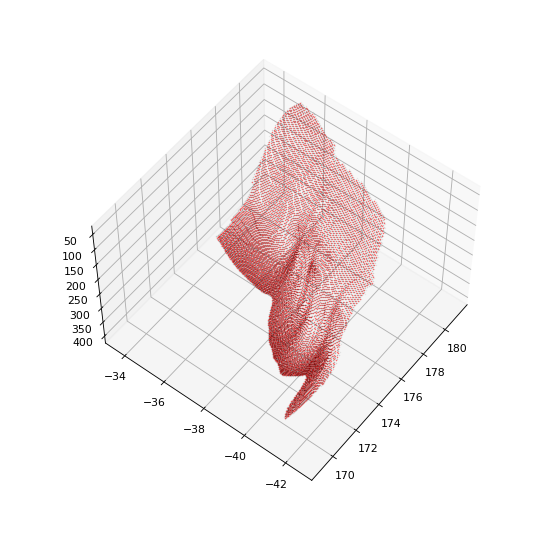

In [6]:
# visual check
#read_plot_meshgrid(), read_plot_grid('grids/puy_grids.csv')

read_plot_meshgrid('grids/hik_11km_meshed-midslabgrids.csv')